#**QUESTION** 
Generate a dataset using any quadratic or third-degree polynomial function. It should contain at least 100 data samples. Implement the following steps : 
* Use linear regression closed-form solution or Singular Value Decomposition (SVD) methods (eg, using the least-squares package) to solve the regression problem.
* Use regularized linear models (ridge, LASSO and ElasticNet) to solve the regression problem
* Compare and interpret the results. You are allowed to use scipy and scikit-learn tools.





## Imports

In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error


## Dataset

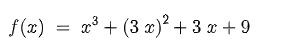

In [ ]:
# Generating the dataset

np.random.seed(42) 
# to make this code example reproducible 
# the same set of numbers will appear every time.

m = 400 # number of instances

X = 13 * np.random.rand(m, 1) - 9 # column vector
# [0,1) values
# uniform distribution
# *4 = change the interval to [0,4)

# create a third-degree function 
y_first = np.power(X,3) + np.power(3*X,2) +  3 * X + 9    

# add some gaussian noise
y = y_first + 5 * np.random.randn(m, 1) # column vector 
# normal distribution 
# mean = 0, variance = 1

In [ ]:
print("Shape of X: ", X.shape)
print("Shape of Y without noise : ", y_first.shape)
print("Shape of Y with noise: ", y.shape)

Shape of X:  (400, 1)
Shape of Y without noise :  (400, 1)
Shape of Y with noise:  (400, 1)


In [ ]:
X

array([[-4.13097845e+00],
       [ 3.35928598e+00],
       [ 5.15921244e-01],
       [-1.21743971e+00],
       [-6.97175767e+00],
       [-6.97207124e+00],
       [-8.24491304e+00],
       [ 2.26028990e+00],
       [-1.18550485e+00],
       [ 2.04943511e-01],
       [-8.73240157e+00],
       [ 3.60882808e+00],
       [ 1.82175433e+00],
       [-6.23959156e+00],
       [-6.63627543e+00],
       [-6.61574137e+00],
       [-5.04485084e+00],
       [-2.17816639e+00],
       [-3.38471476e+00],
       [-5.21402118e+00],
       [-1.04591237e+00],
       [-7.18657981e+00],
       [-5.20211957e+00],
       [-4.23729604e+00],
       [-3.07109021e+00],
       [ 1.20728750e+00],
       [-6.40424083e+00],
       [-2.31495230e+00],
       [-1.29861060e+00],
       [-8.39614463e+00],
       [-1.10191693e+00],
       [-6.78318639e+00],
       [-8.15432929e+00],
       [ 3.33551198e+00],
       [ 3.55321643e+00],
       [ 1.50916553e+00],
       [-5.04002100e+00],
       [-7.73026252e+00],
       [-1.0

In [ ]:
# without noise
y_first

array([[ 79.69683451],
       [158.54995706],
       [ 13.08066149],
       [ 16.88267606],
       [ 86.6682668 ],
       [ 86.66095194],
       [ 35.59500843],
       [ 73.30868195],
       [ 16.42614686],
       [ 10.00145512],
       [  3.20846969],
       [184.03932317],
       [ 50.3803805 ],
       [ 97.75083473],
       [ 93.18996213],
       [ 93.50708834],
       [ 94.52605029],
       [ 34.83106837],
       [ 63.1762143 ],
       [ 96.28362049],
       [ 14.56349932],
       [ 81.09784499],
       [ 96.17206385],
       [ 81.80092655],
       [ 55.70580565],
       [ 27.49942399],
       [ 96.2505244 ],
       [ 37.88034149],
       [ 18.09171042],
       [ 26.38049786],
       [ 15.28426684],
       [ 90.64962091],
       [ 40.76826745],
       [156.24700394],
       [178.14836266],
       [ 37.46296793],
       [ 94.47057783],
       [ 61.68486259],
       [  8.78310093],
       [ 60.65093292],
       [ 73.95341035],
       [ 43.58842939],
       [ 16.04423101],
       [111

In [ ]:
# with noise
y

array([[ 8.62242285e+01],
       [ 1.58654976e+02],
       [ 1.64904264e+01],
       [ 1.53313423e+01],
       [ 8.82890986e+01],
       [ 8.60102367e+01],
       [ 3.60799883e+01],
       [ 7.62844671e+01],
       [ 1.23350434e+01],
       [ 2.04633915e+01],
       [-1.82161722e+00],
       [ 1.77968380e+02],
       [ 5.61709349e+01],
       [ 1.01709148e+02],
       [ 9.63105612e+01],
       [ 9.66488159e+01],
       [ 9.44648164e+01],
       [ 3.03447965e+01],
       [ 6.35552371e+01],
       [ 9.28978119e+01],
       [ 1.94390980e+01],
       [ 8.03625581e+01],
       [ 9.20445779e+01],
       [ 8.01939973e+01],
       [ 5.77704629e+01],
       [ 2.46808012e+01],
       [ 9.21394224e+01],
       [ 3.90987775e+01],
       [ 1.93165433e+01],
       [ 2.38457820e+01],
       [ 1.29290753e+01],
       [ 9.18098706e+01],
       [ 3.35278457e+01],
       [ 1.49209685e+02],
       [ 1.74556142e+02],
       [ 3.63957322e+01],
       [ 9.60251157e+01],
       [ 6.90616437e+01],
       [ 1.3

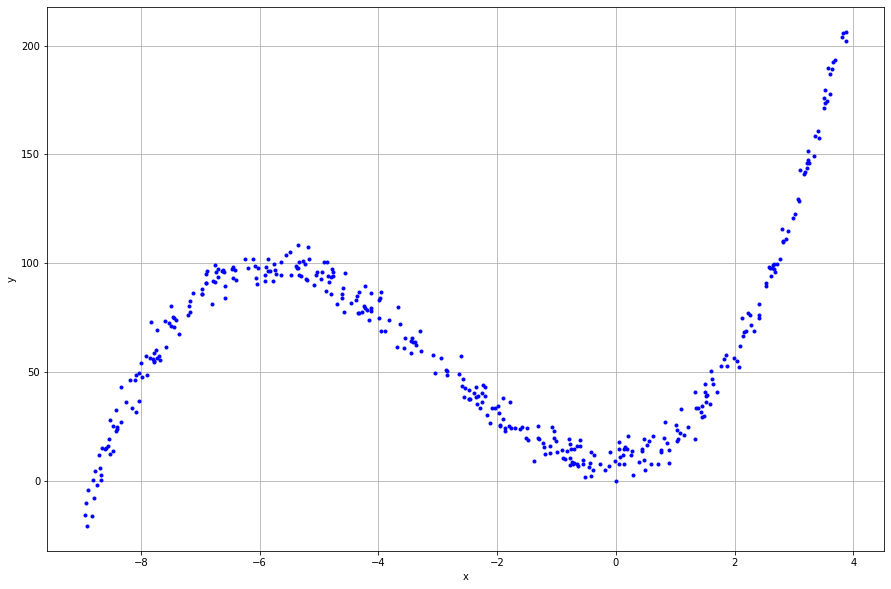

In [ ]:
# plot 
plt.figure(figsize=(15, 10))
plt.plot(X, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Linear Regression

### Closed Form 

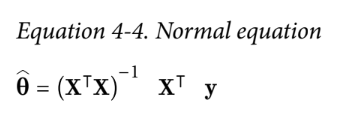

In [ ]:
# Closed Form Solution 

X_b = add_dummy_feature(X) # add x0 = 1 to each instance for bias 
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# inv : inverse
# T : transpose
# @ : matrix multiplication 

In [ ]:
X_b

array([[ 1.00000000e+00, -4.13097845e+00],
       [ 1.00000000e+00,  3.35928598e+00],
       [ 1.00000000e+00,  5.15921244e-01],
       [ 1.00000000e+00, -1.21743971e+00],
       [ 1.00000000e+00, -6.97175767e+00],
       [ 1.00000000e+00, -6.97207124e+00],
       [ 1.00000000e+00, -8.24491304e+00],
       [ 1.00000000e+00,  2.26028990e+00],
       [ 1.00000000e+00, -1.18550485e+00],
       [ 1.00000000e+00,  2.04943511e-01],
       [ 1.00000000e+00, -8.73240157e+00],
       [ 1.00000000e+00,  3.60882808e+00],
       [ 1.00000000e+00,  1.82175433e+00],
       [ 1.00000000e+00, -6.23959156e+00],
       [ 1.00000000e+00, -6.63627543e+00],
       [ 1.00000000e+00, -6.61574137e+00],
       [ 1.00000000e+00, -5.04485084e+00],
       [ 1.00000000e+00, -2.17816639e+00],
       [ 1.00000000e+00, -3.38471476e+00],
       [ 1.00000000e+00, -5.21402118e+00],
       [ 1.00000000e+00, -1.04591237e+00],
       [ 1.00000000e+00, -7.18657981e+00],
       [ 1.00000000e+00, -5.20211957e+00],
       [ 1.

In [ ]:
theta_best # best parameters
# 1. weight of x1
# 2. coefficent of bias, x0

array([[66.04520934],
       [ 1.90932659]])

#### Experiment
* f(0) = 9
* f(2) = 59

In [ ]:
# Experiment :
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict_experiment = X_new_b @ theta_best
y_predict_experiment

array([[66.04520934],
       [69.86386251]])

In [ ]:
y_predict = X_b @ theta_best
y_predict

array([[58.15782235],
       [72.45918338],
       [67.03027149],
       [63.72071934],
       [52.73384706],
       [52.73324837],
       [50.30297766],
       [70.36084093],
       [63.78169342],
       [66.43651343],
       [49.37220285],
       [72.93564073],
       [69.52353332],
       [54.13179128],
       [53.37439223],
       [53.41359845],
       [56.4129415 ],
       [61.88637834],
       [59.58268346],
       [56.08994008],
       [64.04822105],
       [52.32368144],
       [56.11266414],
       [57.95482736],
       [60.18149516],
       [68.35031546],
       [53.81742205],
       [61.62520936],
       [63.56573759],
       [50.01422716],
       [63.94129006],
       [53.09389122],
       [50.47593163],
       [72.41379105],
       [72.82945994],
       [68.9266992 ],
       [56.42216325],
       [51.28561359],
       [65.84478608],
       [59.78640322],
       [51.89041106],
       [61.15217777],
       [49.71483599],
       [71.43173511],
       [55.28451155],
       [65

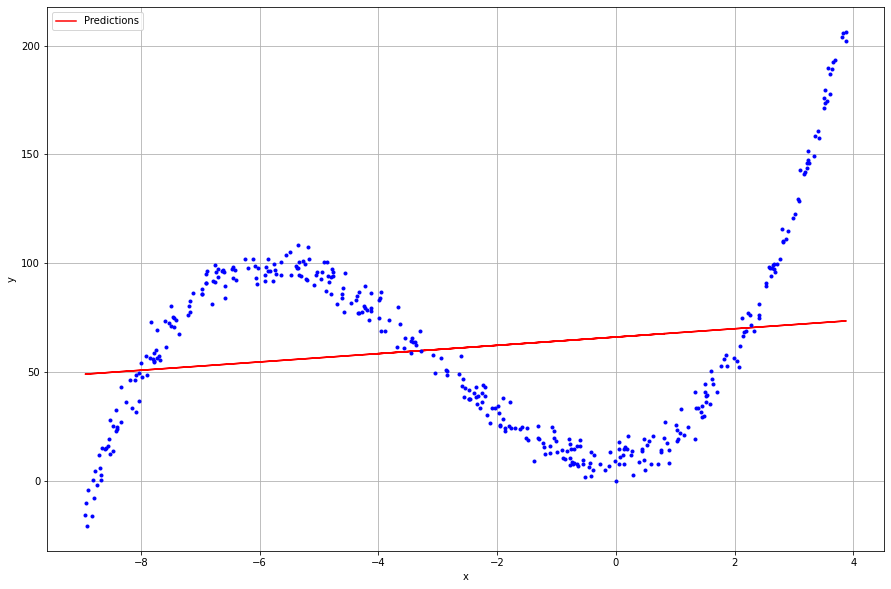

In [ ]:
plt.figure(figsize=(15, 10))  
plt.plot(X, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Calculate lost
np.sum((y_predict - y)**2) / m

1988.8140828184532

In [ ]:
mean_squared_error(y, y_predict)

1988.8140828184532

### SVD
* The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly

In [ ]:
# SVD : same theta_best

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# intercept : bias
# coef : weights

(array([66.04520934]), array([[1.90932659]]))

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[66.04520934],
       [ 1.90932659]])

###  Regularized Linear Models

#### Ridge

In [ ]:
# Ridge
# matrix factorization technique by André-Louis Cholesky):

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[68.90906549]])

In [ ]:
y_predict_ridge = ridge_reg.predict(X)

In [ ]:
mean_squared_error(y, y_predict_ridge)

1988.8140828341152

#### Lasso

In [ ]:
# Lasso

lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([68.79713443])

In [ ]:
y_predict_lasso = lasso_reg.predict(X)

In [ ]:
mean_squared_error(y, y_predict_lasso)

1988.8250816369678

#### Elastic Net

In [ ]:
# Elastic Net

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([68.86858468])

In [ ]:
y_predict_elastic = elastic_net.predict(X)

In [ ]:
mean_squared_error(y, y_predict_elastic)

1988.8155274951869

## Polynomial Regression
* Note that when there are multiple features, polynomial regression is capable of finding relationships between features, which is something a plain linear regression
model cannot do. This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. 

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
# transform our training data, adding the cubic 
# (third-degree polynomial) of each feature in 
# the training set as a new feature (in this case
# there is just one feature):

X_poly = poly_features.fit_transform(X)
X[0]

array([-4.13097845])

In [ ]:
X_poly[0]
# X_poly now contains the original feature of X plus the cube of this feature. Now we
# can fit a LinearRegression model to this extended training data

array([ -4.13097845,  17.064983  , -70.49507709])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# weights of terms :
# bias : 9.16
# x :  2.81
# x^2 : 8.95
# x^3 : 0.99
# very close to the original

(array([9.16386828]), array([[2.81360657, 8.95476006, 0.998564  ]]))

In [ ]:
y_predict_poly = lin_reg.predict(X_poly)

In [ ]:
X_new = np.linspace(-9, 4, 400).reshape(400, 1) # 
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

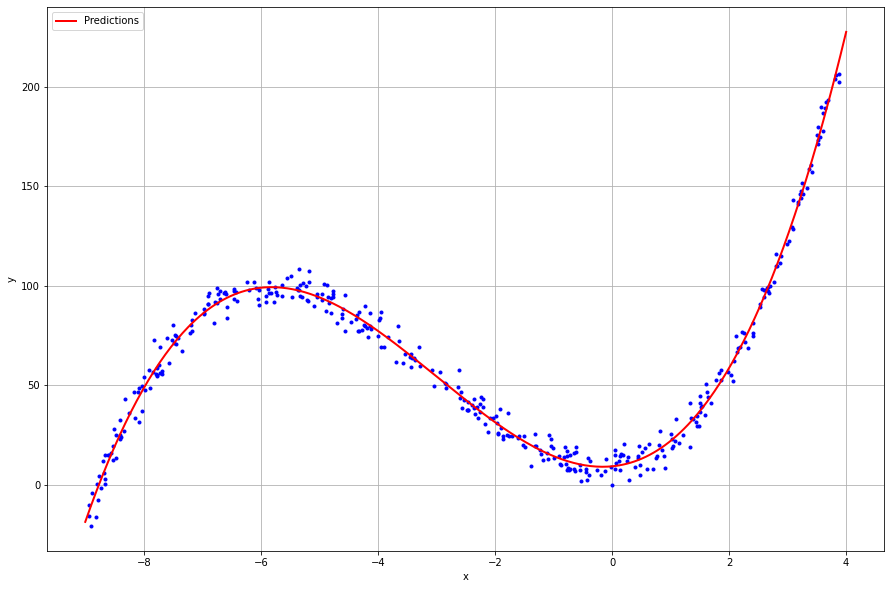

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [ ]:
mean_squared_error(y, y_predict_poly)

24.894541180966407

## Conclusion 

### Comparison
* Loss : 

  1.   Polynomial
  2.   Linear/ SVD
  3.   Ridge
  4.   Elastic Net
  5.   Lasso


In [ ]:
ridge_reg2 = Ridge(alpha=0.1, solver="cholesky")
ridge_reg2.fit(X_poly, y)
ridge_pred=ridge_reg2.predict(X_poly)
mean_squared_error(y, ridge_pred)

24.894541539910097

In [ ]:
ridge_reg2 = Ridge(alpha=1, solver="cholesky")
ridge_reg2.fit(X_poly, y)
ridge_pred=ridge_reg2.predict(X_poly)
mean_squared_error(y, ridge_pred)

24.89457705349363

In [ ]:
lasso_reg2 = Lasso(alpha=0.1)
lasso_reg2.fit(X_poly, y)
lasso_pred=lasso_reg2.predict(X_poly)
mean_squared_error(y, lasso_pred)

24.897859108752126

In [ ]:
el_reg2 = ElasticNet(alpha=0.1, l1_ratio=0.5)
el_reg2.fit(X_poly, y)
el_pred=el_reg2.predict(X_poly)
mean_squared_error(y, el_pred)

24.915704462550902